# **Parking Space occupancy detection using Convolutional Neural Network**

---



**Daneshwari Kankanwadi**

B.Tech - CSE

School of Engineering

Jawharlal Nehru University, New Delhi

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
gdrive	sample_data


In [ ]:
%cd gdrive/MyDrive/'Colab Notebooks'/DIP/Final_CNN

/content/gdrive/MyDrive/Colab Notebooks/DIP/Final_CNN


In [ ]:
#importing all the required libraries
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
import seaborn as sns
sns.set()

In [ ]:
# these are the dimensions of images, images are coloured
num_pixels = 45*45
img_height = 45
img_width = 45

# **reading the dataset which is stored in .npy file format**

I had earlier stored images data in two different way, one was a list of images(ufpr04.npy) and other was array(ufpr04_arr.npy). Thus I have loaded both to see their effects. 

In [ ]:
input = np.load("./dataset/ufpr04/ufpr04.npy" ,allow_pickle=True)
input_arr = np.load("./dataset/ufpr04_arr/ufpr04_arr.npy" ,allow_pickle=True)

In [ ]:
#printing the loaded 'input' details
#at the end, the information of first image from data is printed 
#as [parking space name, weather, class, pixels]
#weather - 0:Sunny, 1:Rainy, 2:Cloudy 
#class - 0:Empty, 1:Occupied

print(type(input))
print(len(input))
print(type(input[0]))
print(type(input[0][3]))
print(input[0])

<class 'numpy.ndarray'>
72535
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
['2012-12-11_17_06_09#008.jpg' 0 0
 array([[[187, 206, 214],
        [176, 195, 203],
        [160, 179, 187],
        ...,
        [220, 231, 235],
        [224, 236, 234],
        [226, 240, 235]],

       [[184, 203, 211],
        [185, 203, 212],
        [180, 199, 207],
        ...,
        [208, 216, 219],
        [214, 222, 224],
        [218, 226, 226]],

       [[172, 190, 201],
        [173, 191, 202],
        [174, 193, 202],
        ...,
        [184, 193, 194],
        [198, 205, 205],
        [207, 213, 212]],

       ...,

       [[185, 191, 190],
        [184, 190, 189],
        [184, 190, 189],
        ...,
        [181, 189, 186],
        [181, 190, 187],
        [180, 189, 186]],

       [[185, 189, 190],
        [186, 190, 191],
        [186, 191, 191],
        ...,
        [182, 191, 187],
        [182, 192, 186],
        [181, 191, 186]],

       [[190, 196, 195],
        [190, 196, 195]

In [ ]:
#printing the loaded 'input_arr' details
print(type(input_arr))
print(len(input_arr))
print(type(input_arr[0]))
print(type(input_arr[0][3]))
print(input_arr[0])

<class 'numpy.ndarray'>
72535
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
['2012-12-11_17_06_09#008.jpg' 0 0
 array([[[187, 206, 214],
        [176, 195, 203],
        [160, 179, 187],
        ...,
        [220, 231, 235],
        [224, 236, 234],
        [226, 240, 235]],

       [[184, 203, 211],
        [185, 203, 212],
        [180, 199, 207],
        ...,
        [208, 216, 219],
        [214, 222, 224],
        [218, 226, 226]],

       [[172, 190, 201],
        [173, 191, 202],
        [174, 193, 202],
        ...,
        [184, 193, 194],
        [198, 205, 205],
        [207, 213, 212]],

       ...,

       [[185, 191, 190],
        [184, 190, 189],
        [184, 190, 189],
        ...,
        [181, 189, 186],
        [181, 190, 187],
        [180, 189, 186]],

       [[185, 189, 190],
        [186, 190, 191],
        [186, 191, 191],
        ...,
        [182, 191, 187],
        [182, 192, 186],
        [181, 191, 186]],

       [[190, 196, 195],
        [190, 196, 195]

# input_final is an array that stores [weather, labels, pixels]

In [ ]:
#Since name of images was of no use, thus I created an input_final array to store only weather, labels, and pixels
#also, input_final is used to see how after shuffling the data, distribution is there.
input_final = []
for i in range(0,len(input_arr)):
  w = input_arr[i][1]
  l = input_arr[i][2]
  px = input_arr[i][3].astype("float32")
  input_final.append([w,l,px])

print(type(input_final))
input_final = np.array(input_final)
print(type(input_final))

print(type(input_final[3]))
print(input_final.shape)
print(input_final[0].shape)
print(input_final[0][2].dtype)
print(input_final[0][2].shape)

<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(72535, 3)
(3,)
float32
(45, 45, 3)


In [ ]:
print(input_final[0])

[0 0
 array([[[187., 206., 214.],
        [176., 195., 203.],
        [160., 179., 187.],
        ...,
        [220., 231., 235.],
        [224., 236., 234.],
        [226., 240., 235.]],

       [[184., 203., 211.],
        [185., 203., 212.],
        [180., 199., 207.],
        ...,
        [208., 216., 219.],
        [214., 222., 224.],
        [218., 226., 226.]],

       [[172., 190., 201.],
        [173., 191., 202.],
        [174., 193., 202.],
        ...,
        [184., 193., 194.],
        [198., 205., 205.],
        [207., 213., 212.]],

       ...,

       [[185., 191., 190.],
        [184., 190., 189.],
        [184., 190., 189.],
        ...,
        [181., 189., 186.],
        [181., 190., 187.],
        [180., 189., 186.]],

       [[185., 189., 190.],
        [186., 190., 191.],
        [186., 191., 191.],
        ...,
        [182., 191., 187.],
        [182., 192., 186.],
        [181., 191., 186.]],

       [[190., 196., 195.],
        [190., 196., 195.],
        [1

In [ ]:
X_final = input_final[:, 2]
y_final = input_final[:, 1]
print(X_final.shape, y_final.shape)

(72535,) (72535,)


In [ ]:
Counter(l for l in y_final)           #count of 1 and 0 in output

Counter({0: 25976, 1: 46559})

In [ ]:
Counter(l for l in input_arr[:, 2])           #count of 1 and 0 in output

Counter({0: 35497, 1: 37038})

##input_final is used to see how splitting is happening after reshuffling, whether or not classes are shuffled.

# Data Visualisation by plotting the images and distribution

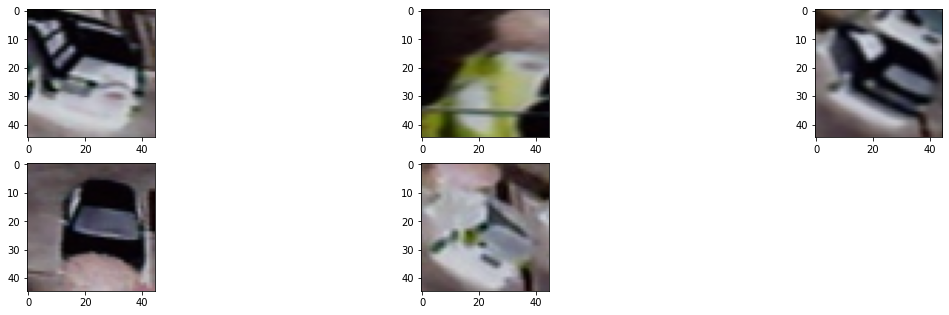

In [ ]:
for i in range(5):
  plt.figure(1,figsize=(20,8))
  plt.subplot(330+1+i)
  im = (X_final[100+i]*255).astype(np.uint8)
  plt.imshow(im)
  plt.show

### Plotting the distribution

Text(0, 0.5, 'Count')

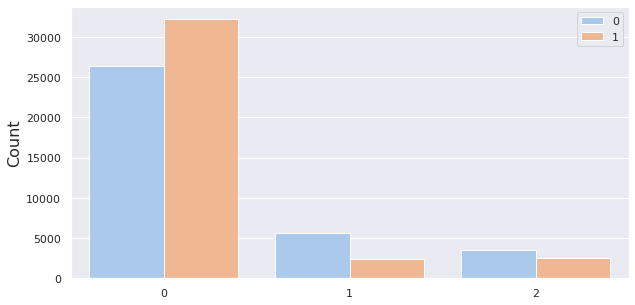

In [ ]:
plt.figure(figsize=(10,5))
sns.set_palette("pastel")
fig = sns.countplot(x= input_arr[:,1], hue=input_arr[:,2])
plt.ylabel("Count", fontsize=16)

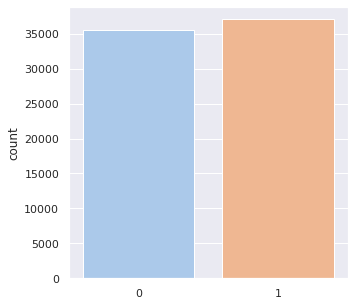

In [ ]:
plt.figure(figsize=(5,5))
sns.set_palette("pastel")
sns.countplot(x=input_arr[:,2])

## To see how reshuffling is happening, thus we print y_train_final, y_val_final, y_test_final and see whether each class has almost similar number of data

In [ ]:
import random
random.shuffle(input_final)     #for now not shufffling

In [ ]:
#splitting data into training and test data input_final- X_final, y_final
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(input_final[:,2], input_final[:,1], train_size=0.8, random_state=42)       #output dimension is ready, input left

In [ ]:
#splitting training data in training and validation data
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(X_train_final, y_train_final, train_size=0.75, test_size=0.25)       

In [ ]:
print(y_train_final)
print(y_val_final)
print("--------------\n", y_test_final)

[0 1 0 ... 1 0 1]
[1 1 0 ... 0 1 0]
--------------
 [1 0 0 ... 1 1 0]


In [ ]:
c1 = Counter(l for l in y_train_final)           #count of 1 and 0 in output
c2 = Counter(l for l in y_val_final)           #count of 1 and 0 in output 
c3 = Counter(l for l in y_test_final)           #count of 1 and 0 in output

In [ ]:
print(c1, c2, c3)

Counter({1: 27833, 0: 15688}) Counter({1: 9367, 0: 5140}) Counter({1: 9359, 0: 5148})


The above distibution tells us that class 1(Occupied) has more samples

# **Creating input(X) and output(y) dataset from input_arr**

In [ ]:
#output array y
y = input_arr[:,2]
print(type(y))
print(y.shape)
print(y[0])
print(y)
labelre = y.reshape(y.shape[0],1)          #rehsaping output to (72535,1) -> to_categorical gives (72535,2)
#labelre = label_train.reshape(50774,1)
print(labelre.shape)
print(type(labelre))
print(type(labelre[0]))
print(labelre[0])
print(labelre)

<class 'numpy.ndarray'>
(72535,)
0
[0 0 0 ... 1 1 1]
(72535, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0]
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [ ]:
# training output is one-hot encoded
y = to_categorical(labelre, 2)

In [ ]:
print(type(y))
print(type(y[0]))
print(y[0])
print(y.shape)
print(y)                    #final output to be used after splitting

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[1. 0.]
(72535, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
Counter(l for l in y)           #countof 1 and 0 in output y

Counter({0: 35497, 1: 37038})

In [ ]:
#input array X
X = input_arr[:,3]
print(type(X))
print(type(X[0]))
print(X.shape)
print(X[0].shape)
print(X[0].size)

In [ ]:
#Since X is a shape of (72535,), -> reshaping to (72535, 45,45,3)
img = []

for i in range(0,len(X)):
  img.append((X[i]).astype("float32"))

print(type(img))
img = np.array(img, dtype="float32")
print(type(img))

print(type(img[0]))
print(img.shape)

In [ ]:
#now img the main input data, i.e. array of pixels, in float32 format
print(type(img))
print(img.dtype)
print(img[0].dtype)
print(img[0][0].dtype)
print(img[0].shape)
print(img[0])

# **Preprocessing the data before feeding it in the model**

First zero-centering then normalising

In [ ]:
#zero-centering of pixels values,     sample only, actual zero-centering is done after splitting
img_zero = img/np.std(img, axis = 0)
print(type(img_zero))
print(img_zero.dtype)
print(img_zero)

<class 'numpy.ndarray'>
float32
[[[[3.5458302 3.901994  3.9459815]
   [3.2741098 3.6408362 3.6998696]
   [2.9328156 3.3073962 3.3798554]
   ...
   [4.905145  5.098189  5.1062403]
   [4.9459066 5.170372  5.030088 ]
   [4.8396454 5.1177945 4.9275956]]

  [[3.527164  3.8830411 3.9231534]
   [3.4498568 3.7991564 3.8667748]
   [3.2940068 3.6692557 3.7284117]
   ...
   [4.6768866 4.8074026 4.79435  ]
   [4.7316933 4.849183  4.805248 ]
   [4.675764  4.799091  4.7244644]]

  [[3.174479  3.511811  3.616593 ]
   [3.1525753 3.4873655 3.6044114]
   [3.1252844 3.4693177 3.559954 ]
   ...
   [4.1044283 4.246833  4.1844296]
   [4.376266  4.4652467 4.3754144]
   [4.518846  4.5857315 4.4756384]]

  ...

  [[4.4352784 4.327892  4.1672363]
   [4.430351  4.3044615 4.152144 ]
   [4.3810115 4.249519  4.102415 ]
   ...
   [3.8914602 4.0908465 3.9603329]
   [3.935758  4.143087  3.9932697]
   [4.087607  4.2356615 4.0417757]]

  [[4.400687  4.2663116 4.1618204]
   [4.4513865 4.2916303 4.1924725]
   [4.4459395 4

In [ ]:
#Normalising the pixels vales such that they lie in range [0,1]
img_norm = img_zero/img_zero.max()

Printing the minimum, maximum, mean and standard deviation values

In [ ]:
img.min(), img.max(), img.mean(), img.std()

(0.0, 255.0, 162.89522, 54.18817)

In [ ]:
img_zero.min(), img_zero.max(), img_zero.mean(), img_zero.std()

(0.0, 6.1940293, 3.083555, 1.0628345)

In [ ]:
img_norm.min(), img_norm.max(), img_norm.mean(), img_norm.std()

(0.0, 1.0, 0.49782658, 0.17159033)

# **Splitting of dataset img into train, validation, and test dataset**

In [ ]:
import random
random.shuffle(img)     

In [ ]:
#splitting data into training and test data
X_train, X_test, y_train, y_test = train_test_split(img, y, train_size=0.8, random_state=42)       #output dimension is ready, input left

In [ ]:
#splitting training data in training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.75, test_size=0.25)       

In [ ]:
#zero-centering and normalising the train data set
X_train = X_train/ np.std(X_train, axis=0)
X_train = X_train/X_train.max()

In [ ]:
X_train.min(), X_train.max(), X_train.mean(), X_train.std()

(0.0, 1.0, 0.47178942, 0.17466708)

In [ ]:
#zero-centering and normalising the validation data set
X_val = X_val/ np.std(X_val, axis=0)
X_val = X_val/X_val.max()
X_val.min(), X_val.max(), X_val.mean(), X_val.std()

(0.0, 1.0, 0.47770584, 0.17656778)

In [ ]:
#zero-centering and normalising the test data set
X_test = X_test/ np.std(X_test, axis=0)
X_test = X_test/X_test.max()
X_test.min(), X_test.max(), X_test.mean(), X_test.std()

(0.0, 1.0, 0.4746256, 0.17636144)

In [ ]:
print('Train dimension:') 
print(X_train.shape)
print('Validation dimension:') 
print(X_val.shape)
print('Test Dimension:')
print(X_test.shape)

print('Train output dimension:') 
print(y_train.shape)
print('Validation output Dimension:')
print(y_val.shape)
print('Test output Dimension:')
print(y_test.shape)

Train dimension:
(43521, 45, 45, 3)
Validation dimension:
(14507, 45, 45, 3)
Test Dimension:
(14507, 45, 45, 3)
Train output dimension:
(43521, 2)
Validation output Dimension:
(14507, 2)
Test output Dimension:
(14507, 2)


In [ ]:
print(type(X_train))
print(type(X_train[0]))
print(X_train[0])
print(X_train[0].shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[[0.5444568  0.59614515 0.57314676]
  [0.52856445 0.5821528  0.5614034 ]
  [0.5216723  0.57060385 0.55408674]
  ...
  [0.59655666 0.6124481  0.591959  ]
  [0.5168357  0.5342438  0.5137497 ]
  [0.48058245 0.49869737 0.48024416]]

 [[0.57762307 0.6183019  0.59334695]
  [0.55229074 0.59606105 0.5770654 ]
  [0.5339904  0.5795573  0.56245273]
  ...
  [0.5694534  0.58490217 0.571184  ]
  [0.52041304 0.53495777 0.5219893 ]
  [0.49617782 0.51101977 0.49653158]]

 [[0.59308237 0.62905866 0.60798925]
  [0.5768838  0.61276907 0.59529537]
  [0.5511652  0.5854718  0.57405436]
  ...
  [0.54747736 0.5603364  0.55343354]
  [0.5170491  0.52970845 0.52671695]
  [0.5090359  0.525488   0.51618165]]

 ...

 [[0.68067324 0.6884852  0.69931084]
  [0.7104078  0.7166253  0.72423357]
  [0.7042136  0.7227488  0.7199383 ]
  ...
  [0.3244315  0.3596101  0.3267381 ]
  [0.33273357 0.3735261  0.36266747]
  [0.44777408 0.4835116  0.47915754]]

 [[0.75200754 0.7584858  0

In [ ]:
print(y_train)
print("--------------\n",y_val)
print("--------------\n",y_test)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]
--------------
 [[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
--------------
 [[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


# **CNN Model creation, training, prediction and evaluation**

In [ ]:
bs = 256     #32*8
ep = 50 #30

In [ ]:
num_classes = 2  #one-hot encoded output
starter_learning_rate = 0.001
regularizer_rate = 0.1

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
#defining CNN model
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(45,45,3), data_format='channels_last'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

#define loss and optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 43, 43, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 21, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 21, 21, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 19, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 9, 9, 128)         5

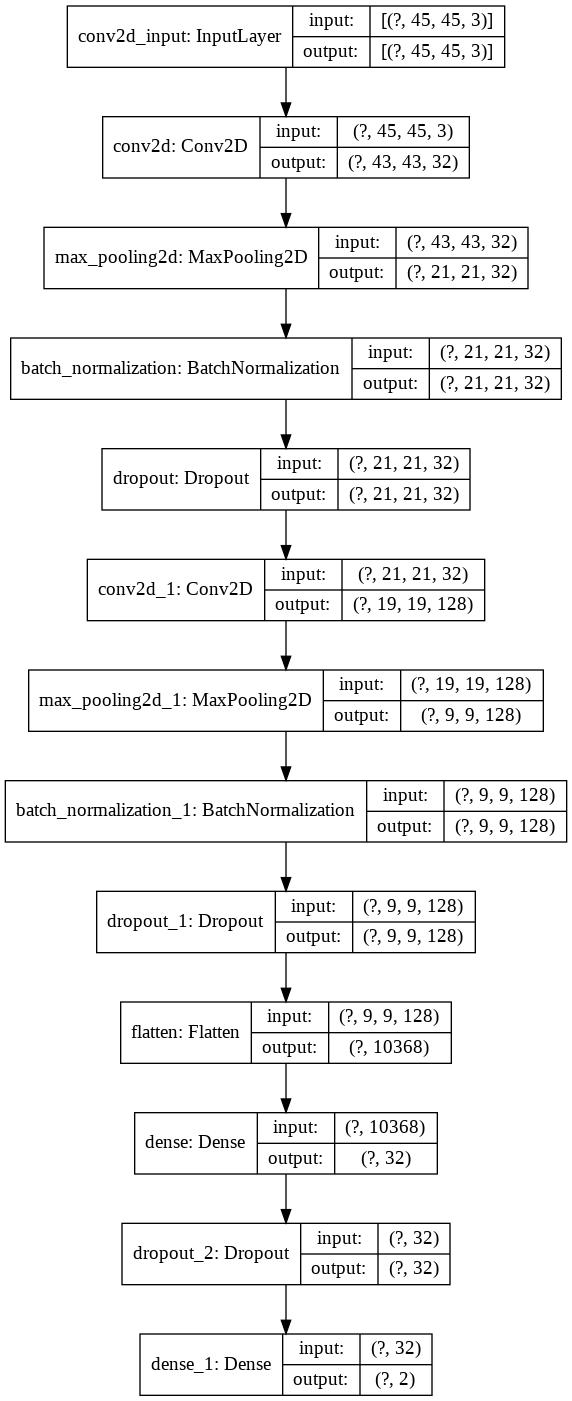

In [ ]:
#prints model architecture
plot_model(model, "CNN_parking.jpg", show_shapes=True, show_layer_names=True)

In [ ]:
#prints the required shapes and input dtypes for each layer
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

(None, 45, 45, 3) <dtype: 'float32'>
(None, 2) <dtype: 'float32'>
conv2d (None, 45, 45, 3) float32
max_pooling2d (None, 43, 43, 32) float32
batch_normalization (None, 21, 21, 32) float32
dropout (None, 21, 21, 32) float32
conv2d_1 (None, 21, 21, 32) float32
max_pooling2d_1 (None, 19, 19, 128) float32
batch_normalization_1 (None, 9, 9, 128) float32
dropout_1 (None, 9, 9, 128) float32
flatten (None, 9, 9, 128) float32
dense (None, 10368) float32
dropout_2 (None, 32) float32
dense_1 (None, 32) float32


[None, None, None, None, None, None, None, None, None, None, None, None]

In [ ]:
# Callbacks for model
callbacks = [EarlyStopping(patience=4, monitor='val_accuracy', mode='max'), 
              ReduceLROnPlateau(patience=2, verbose=1)]

In [ ]:
#fit the model
history = model.fit(X_train, y_train, 
                           epochs=ep,
                           batch_size=bs,
                           callbacks=callbacks,
                           validation_data=(X_val,y_val)
)

Epoch 1/50
171/171 [==============================] - 3s 16ms/step - loss: 0.7302 - accuracy: 0.5071 - val_loss: 0.7510 - val_accuracy: 0.5024
Epoch 2/50
171/171 [==============================] - 2s 14ms/step - loss: 0.6941 - accuracy: 0.5099 - val_loss: 0.7931 - val_accuracy: 0.5124
Epoch 3/50
171/171 [==============================] - 2s 14ms/step - loss: 0.6922 - accuracy: 0.5097 - val_loss: 0.7041 - val_accuracy: 0.5122
Epoch 4/50
171/171 [==============================] - 2s 14ms/step - loss: 0.6913 - accuracy: 0.5089 - val_loss: 0.6905 - val_accuracy: 0.5129
Epoch 5/50
171/171 [==============================] - 2s 14ms/step - loss: 0.6908 - accuracy: 0.5091 - val_loss: 0.6911 - val_accuracy: 0.5150
Epoch 6/50
171/171 [==============================] - ETA: 0s - loss: 0.6902 - accuracy: 0.5139
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
171/171 [==============================] - 2s 14ms/step - loss: 0.6902 - accuracy: 0.5139 - val_loss: 0.6918

"export_path='/content/drive/MyDrive/ML/cnn_gender'\ntf.saved_model.save(gender_model, export_path)"

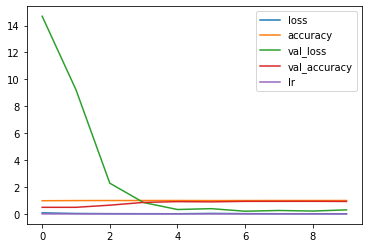

In [ ]:
pd.DataFrame(history.history).plot()      #earlier when data was not shuffled, this plot was obtained with accuracy=99% 

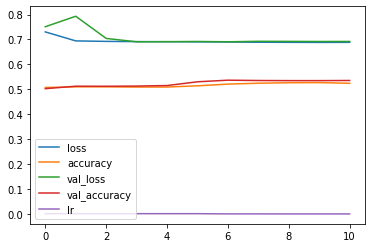

In [ ]:
pd.DataFrame(history.history).plot()    #plot obtained after shuffling the data

In [ ]:
#evaluate the model
loss, acc = model.evaluate(X_test,y_test, verbose=0)
print("Test Accuracy: %.3f" % acc)
#print('Accuracy for test set: {0}'.format(valid_score[1]))

Test Accuracy: 0.543


In [ ]:
#make a prediction
ypred = model.predict(X_test)
print("Predicted: %s (class=%d)" % (ypred, np.argmax(ypred)))

Predicted: [[0.5492795  0.48332733]
 [0.5705264  0.48692858]
 [0.6007589  0.47737873]
 ...
 [0.47907865 0.52086747]
 [0.4520304  0.54819834]
 [0.5016413  0.49806824]] (class=25239)


In [ ]:
ypred = np.argmax(ypred, axis=1)
y_test_arg = np.argmax(y_test, axis=1)

In [ ]:
#Performance evaluation
print(classification_report(y_test_arg, ypred))

              precision    recall  f1-score   support

           0       0.52      0.77      0.62      7094
           1       0.60      0.33      0.42      7413

    accuracy                           0.54     14507
   macro avg       0.56      0.55      0.52     14507
weighted avg       0.56      0.54      0.52     14507



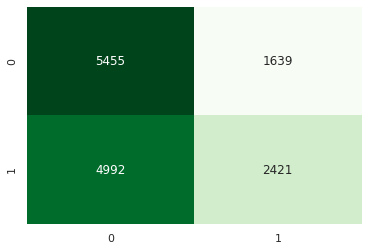

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test_arg, ypred)
sns.heatmap(cm, cmap="Greens", cbar=False, annot=True, fmt='d');

# **Saving the CNN model for parking space occupancy classification**

In [ ]:
#in saved_model format
!mkdir -p saved_parking_model
export_path='saved_parking_model/CNN_parking_model'
model.save(export_path)

INFO:tensorflow:Assets written to: saved_parking_model/CNN_parking_model/assets


In [ ]:
#in hdf5 format
model.save("hdf5_parking_model/CNN_parking_hdf5")

INFO:tensorflow:Assets written to: hdf5_parking_model/CNN_parking_hdf5/assets


### Loading both the saved models- hdf5 and SavedModel format

In [ ]:
#loading saved_model 
saved_model = tf.keras.models.load_model("saved_parking_model/CNN_parking_model")

# Checking its architecture
saved_model.summary()

# Evaluate the restored model
loss, acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('SavedModel Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(saved_model.predict(X_test).shape)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 43, 43, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 21, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 21, 21, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 19, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 9, 9, 128)         5

In [ ]:
#loading hdf5 model
hdf5_model = load_model("hdf5_parking_model/CNN_parking_hdf5")
hdf5_model.summary()

loss, acc = hdf5_model.evaluate(X_test, y_test, verbose=0)
print('HDF5 restored model, accuracy: {:5.2f}%'.format(100 * acc))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 43, 43, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 21, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 21, 21, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 19, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 9, 9, 128)         5